<a href="https://colab.research.google.com/github/ZackAkil/webpage-autoencoder/blob/master/Text_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from PIL import Image, ImageDraw, ImageFont
 

In [0]:
import subprocess

In [3]:
result = subprocess.run(['fc-list'], stdout=subprocess.PIPE)
result.stdout

b'/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf: Liberation Sans Narrow:style=Italic\n/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf: Liberation Sans:style=Regular\n/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf: Liberation Mono:style=Bold Italic\n/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf: Liberation Serif:style=Italic\n/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf: Liberation Mono:style=Bold\n/usr/share/fonts/opentype/font-awesome/FontAwesome.otf: FontAwesome:style=Regular\n/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf: Liberation Sans Narrow:style=Regular\n/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf: Liberation Serif:style=Bold\n/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf: Liberation Mono:style=Regular\n/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf: Liberation Sans:style=Italic\n/usr/share/fonts/truetype/libera

In [4]:
fonts = str(result.stdout).split('\\n')[:-1]
for f in fonts:
  print(f)
fonts = [f.split('truetype/liberation/')[1].split(':')[0] for f in fonts if 'truetype/liberation/' in f]
fonts

b'/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf: Liberation Sans Narrow:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf: Liberation Sans:style=Regular
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf: Liberation Mono:style=Bold Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf: Liberation Serif:style=Italic
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf: Liberation Mono:style=Bold
/usr/share/fonts/opentype/font-awesome/FontAwesome.otf: FontAwesome:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf: Liberation Sans Narrow:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf: Liberation Serif:style=Bold
/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf: Liberation Mono:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf: Liberation Sans:style=Italic
/usr/share/fonts/truetype/liberation/Liber

['LiberationSansNarrow-Italic.ttf',
 'LiberationSans-Regular.ttf',
 'LiberationMono-BoldItalic.ttf',
 'LiberationSerif-Italic.ttf',
 'LiberationMono-Bold.ttf',
 'LiberationSansNarrow-Regular.ttf',
 'LiberationSerif-Bold.ttf',
 'LiberationMono-Regular.ttf',
 'LiberationSans-Italic.ttf',
 'LiberationSerif-BoldItalic.ttf',
 'LiberationSansNarrow-BoldItalic.ttf',
 'LiberationMono-Italic.ttf',
 'LiberationSans-BoldItalic.ttf',
 'LiberationSerif-Regular.ttf',
 'LiberationSansNarrow-Bold.ttf',
 'LiberationSans-Bold.ttf']

In [0]:
import matplotlib
import numpy as np
W, H = (150,60)
img = np.ones([H, W, 3])
matplotlib.image.imsave('background.png', img)

In [0]:
import random

In [0]:
def gen_random_name_image(filename='test.png', message='HI'):

  rand_size = random.randint(22, 25)

  font = ImageFont.truetype(random.choice(fonts), size=rand_size)

  # starting position of the message
  image = Image.open('background.png')
  draw = ImageDraw.Draw(image)

  (x, y) = (25, 25)
  # message = "ZACK AKIL"
  color = 'rgb(0,0,0)'
  # color = 'rgb({0}, {1}, {2})'.format(random.randint(0,255),
  #                                     random.randint(0,255),
  #                                     random.randint(0,255)) 

  w, h = draw.textsize(message, font=font)
  # print(w,h)
  draw.text(((W-w)/2,(H-h)/2), message, fill=color, font=font)

# draw.text((x, y), message, )

  # save the edited image
  image.convert('1').save(filename)

In [8]:
!rm -r images
!mkdir images

rm: cannot remove 'images': No such file or directory


In [9]:
for i in range(1000):
  gen_random_name_image('images/{}.png'.format(i), random.choice(['ZACK AKIL', 'MAKER']))
  if (i%50)==0:
    print('Done ', i)

Done  0
Done  50
Done  100
Done  150
Done  200
Done  250
Done  300
Done  350
Done  400
Done  450
Done  500
Done  550
Done  600
Done  650
Done  700
Done  750
Done  800
Done  850
Done  900
Done  950


# Create auto encoder

In [10]:
import glob
filelist = glob.glob('images/*.png')
len(filelist)

1000

In [0]:
X = np.array([np.array(Image.open(fname)) for fname in filelist])

In [12]:
X.shape

(1000, 60, 150)

In [0]:
import matplotlib.pyplot as plt


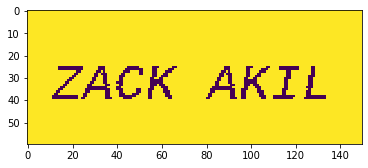

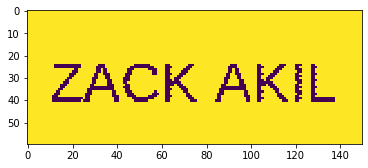

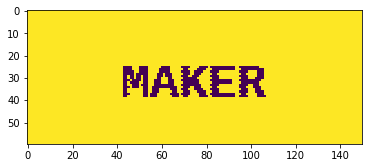

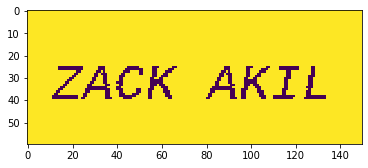

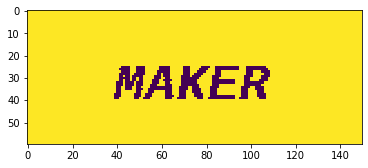

In [14]:
for i in range(5):
  plt.imshow(X[i])
  plt.show()

In [15]:
X.max()

True

In [16]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU, Reshape, Conv2DTranspose, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import numpy as np


In [17]:
input_shape = [X.shape[1], X.shape[2], 1]
input_shape

[60, 150, 1]

In [0]:
keras.backend.clear_session()

encoder_input = Input(shape=input_shape, name='encoder_input')

x = encoder_input

x = Conv2D(32, kernel_size=(3, 3))(x)
x = LeakyReLU()(x)
x = Conv2D(16, kernel_size=(3, 3))(x)
x = LeakyReLU()(x)
shape_before_flattening = K.int_shape(x)[1:]
x = Flatten()(x)
encoder_output = Dense(2, name='encoder_output')(x)

encoder = Model(encoder_input, encoder_output)
# encoder_input = Input(shape=input_shape, name='encoder_input')
# z_mean = Dense(2, name='z_mean')(encoder_output)
# z_log_var = Dense(2, name='z_log_var')(encoder_output)

dencoder_input = Input(shape=(2), name='dencoder_input') 
x = Dense(np.prod(shape_before_flattening))(dencoder_input)
x = Reshape(shape_before_flattening)(x)
x = Conv2DTranspose(16, kernel_size=(3, 3))(x)
x = LeakyReLU()(x)
x = Conv2DTranspose(32, kernel_size=(3, 3))(x)
x = LeakyReLU()(x)
x = Conv2D(1, kernel_size=(3, 3), strides=(1,1), padding='same')(x)
decoder_output = Activation('sigmoid')(x)

decoder = Model(dencoder_input, decoder_output)


model = Model(encoder_input, decoder(encoder_output))

# gen_model = Model(encoder_output, x)


(1, 2)


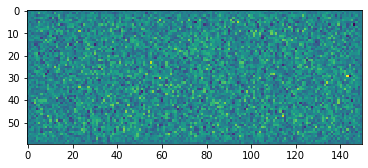

In [145]:
data = np.array([1, 1]).reshape([1,2])
print(data.shape)
out, = decoder.predict(data)
plt.imshow(out[:,:,0])

In [0]:
def sd_loss(y_true=None, y_pred=None):
  mean = K.mean(encoder_output)
  st = K.sqrt( K.mean(K.square(encoder_output - mean)))
  return K.abs(st - 1)

def mean_loss(y_true=None, y_pred=None):
  mean = K.sqrt(K.square(K.mean(encoder_output)))
  return mean/10

def diff_loss(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true)))

  
def loss(y_true, y_pred):
      return diff_loss(y_true, y_pred) + sd_loss() + mean_loss()

 

In [0]:
# model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam())

model.compile(loss=loss, 
              optimizer=keras.optimizers.Adam( learning_rate=0.001),
             metrics=[sd_loss, mean_loss, diff_loss])

In [0]:
train_X = np.reshape(X, [*X.shape, 1])

In [220]:
model.fit(train_X, train_X,
#             batch_size=128,
            epochs=10,
            verbose=1)

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.2301 - sd_loss: 0.0638 - mean_loss: 0.0099 - diff_loss: 0.1550
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.2023 - sd_loss: 0.0496 - mean_loss: 0.0099 - diff_loss: 0.1507
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.2152 - sd_loss: 0.0557 - mean_loss: 0.0104 - diff_loss: 0.1492
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.1984 - sd_loss: 0.0441 - mean_loss: 0.0089 - diff_loss: 0.1467
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.2138 - sd_loss: 0.0538 - mean_loss: 0.0098 - diff_loss: 0.1502
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.2105 - sd_loss: 0.0564 - mean_loss: 0.0086 - diff_loss: 0.1474
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.2043 - sd_loss: 0.0494 - mean_loss: 0.00

In [0]:
preds = model.predict(train_X[:10])

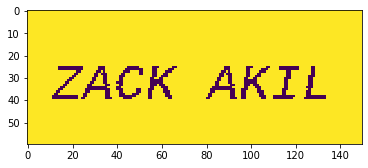

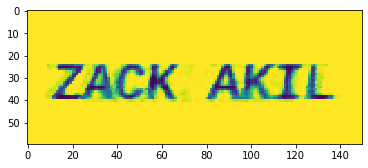

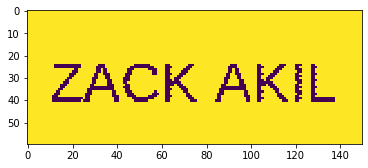

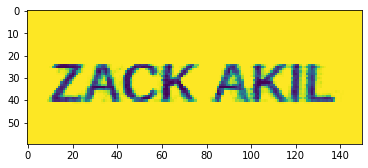

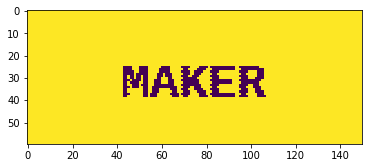

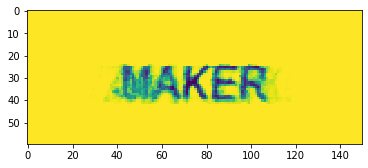

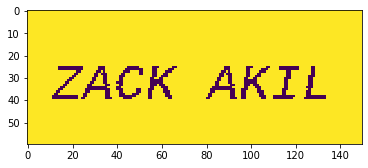

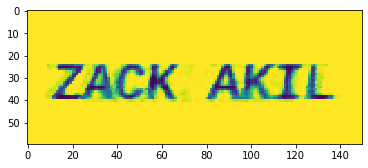

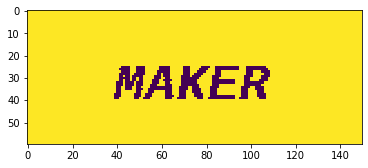

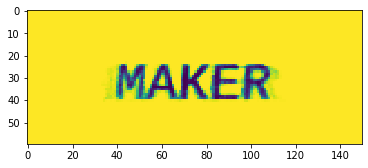

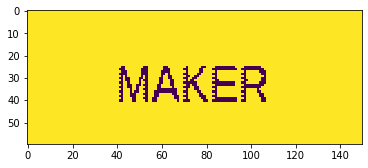

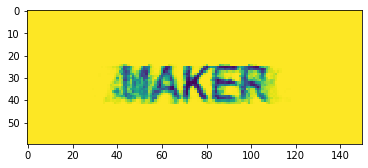

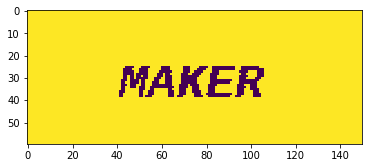

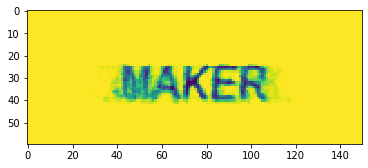

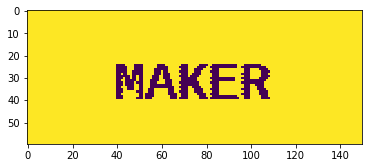

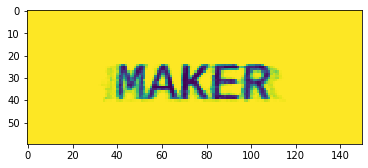

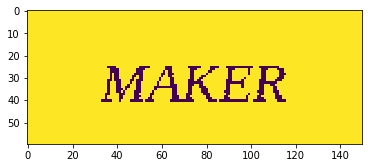

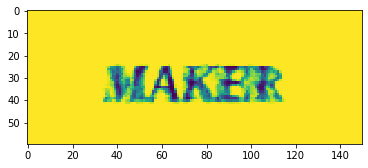

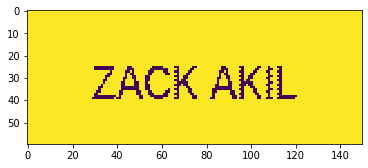

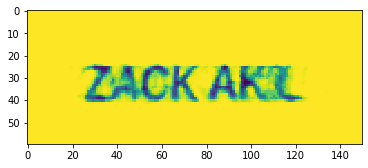

In [223]:
for input, pred in zip(train_X[:10], preds):
  plt.imshow(input[:,:,0])
  plt.show()

  plt.imshow(pred[:,:,0])
  plt.show()

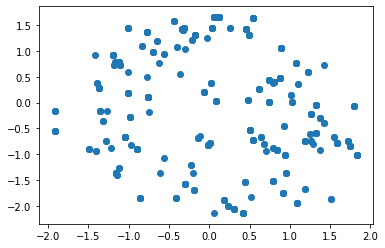

In [224]:
points = encoder.predict(train_X[:400])
plt.scatter(points[:,0], points[:,1])
plt.show()

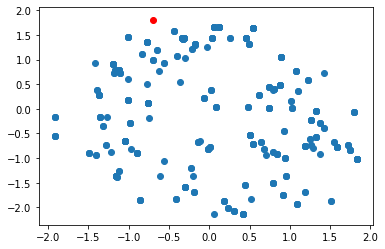

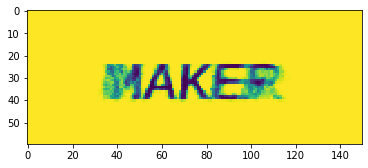

In [229]:
#@title Default title text { run: "auto" }
x_c = -0.7 #@param {type:"slider", min:-3, max:3, step:0.1}
y_c = 1.8 #@param {type:"slider", min:-3, max:3, step:0.1}

input_data = np.array([x_c, y_c]).reshape([1,2])
frame = decoder.predict(input_data)

plt.scatter(points[:,0], points[:,1])
plt.scatter([x_c], [y_c], c='r')
plt.show()
frame.shape
plt.imshow(frame[0,:,:,0])
plt.show()

# Really want to run clustering on this now

In [0]:
from sklearn.cluster import KMeans

In [217]:
cluster = KMeans(n_clusters=2)
cluster.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

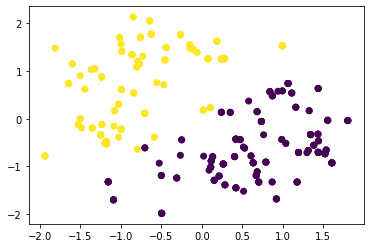

In [218]:
plt.scatter(points[:,0], points[:,1], c=cluster.predict(points))

showing samples from cluster 1


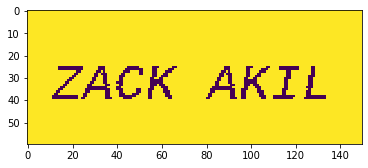

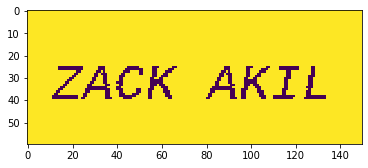

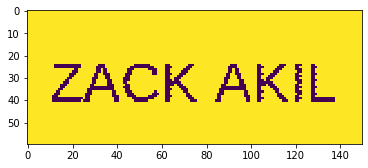

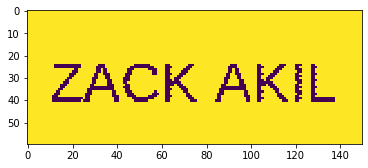

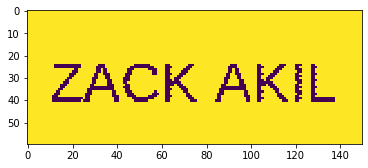

showing samples from cluster 2


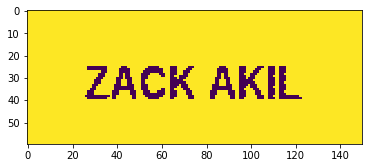

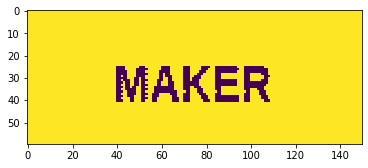

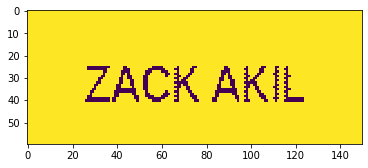

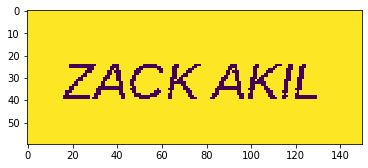

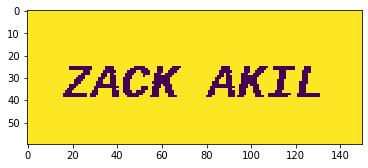

In [219]:
class_1 = train_X[:400][cluster.predict(points)]
class_2 = train_X[:400][cluster.predict(points) == 0]


def display_random_sample(images):
  indecies = np.arange(len(images))
  samples_i = np.random.choice(indecies, 5, replace=False)
  for i in samples_i:
    plt.imshow(images[i,:,:,0])
    plt.show()


print('showing samples from cluster 1')

display_random_sample(class_1)
  
print('showing samples from cluster 2')

display_random_sample(class_2)
  

In [186]:
class_1.shape

(400, 60, 150, 1)

In [0]:
model.save('name.keras')

In [230]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 60, 150, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 58, 148, 32)       320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 58, 148, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 146, 16)       4624      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 56, 146, 16)       0         
_________________________________________________________________
flatten (Flatten)            (None, 130816)            0         
_________________________________________________________________
encoder_output (Dense)       (None, 2)                 2616

In [231]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dencoder_input (InputLayer)  [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 130816)            392448    
_________________________________________________________________
reshape (Reshape)            (None, 56, 146, 16)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 58, 148, 16)       2320      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 58, 148, 16)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 60, 150, 32)       4640      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 60, 150, 32)       0   

In [0]:
decoder.save('decoder.h5')